In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## __Open Dataset__

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## __Data Cleaning__

### __Checking Misiing Values__

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Terdapat 4 fitur yang memiliki data yang hilang, yaitu:** ``children``, ``country``, ``agent``, ``company``

In [5]:
for i in df.columns:
    print(i, df[i].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

__Jika melihat pada hasil di atas, fitur 'meal', 'market_segment', 'distribution_channel' memiliki value string 'Undefined'.__

### __Handling Missing and 'Undefined' Value__

In [6]:
# Fitur 'children'
df['children'] = df['children'].dropna()

Pada fitur 'children' data yang kosong dapat dihapus karena hanya 4 data saja yang hilang, jadi kita tidak kehilangan data yang banyak

In [7]:
# Fitur 'country'
df['country'].fillna('Unknown', inplace=True)

Pada fitur 'country' data yang kosong di isi dengan string 'Unknown'

In [8]:
# Fitur 'agent'
df['agent'].fillna(999, inplace=True)

# Fitur 'company'
df['company'].fillna(999, inplace=True)

Berdasarkan keterangan fitur-fitur dari dataset yang ada di: https://www.sciencedirect.com/science/article/pii/S2352340918315191. Fitur 'agent' yang memiliki data kosong kemungkinan besar reservasinya dilakukan langsung oleh customer sendiri, tanpa melalu agent. Hal ini sama juga tejadi pada fitur 'company'. Jadi kedua fitur tersebut diisi dengan angka 999, sebagai tanda dilakukan resevasi oleh customer sendiri. 

In [9]:
# Fitur 'meal'
df['meal'] = df['meal'].replace(['Undefined'], 'SC')

Berdasarkan keterangan fitur-fitur dari dataset yang ada di: https://www.sciencedirect.com/science/article/pii/S2352340918315191. Value 'Undefined' memiliki kesamaan definisi dengan value 'SC' yaitu no meal package, sehingga value 'Undefined' diubah menjadi 'SC'

In [10]:
# Fitur 'market_segment' dan 'distribution_channel'
print(len(df[df['market_segment']=='Undefined']))
print(len(df[df['distribution_channel']=='Undefined']))

2
5


In [11]:
df = df.drop(df[df['market_segment']=='Undefined'].index)

In [12]:
df = df.drop(df[df['distribution_channel']=='Undefined'].index)

Pada fitur 'market_segment' dan 'distribution_channel' data 'Undefined' didrop karna hanya sedikit, jadi kita tidak kehilangan banyak data.

In [13]:
df.shape

(119385, 32)

### __Checking and Handling Wrong Values__

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119385.0,0.370398,0.482913,0.00,0.00,0.00,1.0,1.0
lead_time,119385.0,104.014809,106.863734,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119385.0,2016.156603,0.707451,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119385.0,27.164996,13.605391,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119385.0,15.798643,8.780765,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119385.0,0.927596,0.998618,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119385.0,2.500306,1.908296,0.00,1.00,2.00,3.0,50.0
adults,119385.0,1.856389,0.579263,0.00,2.00,2.00,2.0,55.0
children,119385.0,0.103882,0.398555,0.00,0.00,0.00,0.0,10.0
babies,119385.0,0.007949,0.097438,0.00,0.00,0.00,0.0,10.0


Fitur 'ADR' adalah Average Daily Rates / Rata-rata harga kamar per harinya. Jika melihat tabel Describe di atas, nilai min pada fitur ADR termasuk yang tidak normal karena memiliki nilai negatif. Oleh karena itu nilai negatif tersebut tidak akan digunakan atau akan di drop.

In [15]:
df = df[df['adr'] > 0]

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,117425.0,0.374767,0.484065,0.00,0.00,0.0,1.0,1.0
lead_time,117425.0,105.087835,106.907626,0.00,19.00,71.0,162.0,709.0
arrival_date_year,117425.0,2016.160324,0.706539,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,117425.0,27.136598,13.575936,1.00,16.00,27.0,38.0,53.0
arrival_date_day_of_month,117425.0,15.803228,8.783516,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,117425.0,0.936419,0.995764,0.00,0.00,1.0,2.0,19.0
stays_in_week_nights,117425.0,2.521226,1.893752,0.00,1.00,2.0,3.0,50.0
adults,117425.0,1.860617,0.482100,0.00,2.00,2.0,2.0,4.0
children,117425.0,0.104501,0.399689,0.00,0.00,0.0,0.0,10.0
babies,117425.0,0.007869,0.097170,0.00,0.00,0.0,0.0,10.0


**Beberapa row pada dataset ini memiliki data tamu 0 (adults = 0, children = 0, babies = 0). Row tersebut merupakan data yang salah. Perlu dilihat ada berapa banyak row yang memiliki data seperti itu.**

In [17]:
len(df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)])

31

Row yang memiliki tamu 0 hanya berjumlah 31, kita dapat menghapus row tersebut.

In [18]:
tamu_0 = list(df.loc[df["adults"] + df["children"] + df["babies"]==0].index)

df.drop(df.index[tamu_0], inplace=True)

In [19]:
df.shape

(117394, 32)

### __Checking and Handling Outlier__

In [20]:
def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

Untuk data numerical, perlu dilihat apakah data tersebut termasuk outlier atau bukan. Fungsi di atas berguna untuk mendeteksi adanya outlier dengan menggunakan metode IQR. 

Kolom yang dideteksi outlier yaitu : `lead_time`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `adr`

In [21]:
kolom = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies', 'adr']

for i in kolom:
    print(f'{i}, {len(find_outlier(df[i]))}')

lead_time, 2960
stays_in_weekend_nights, 255
stays_in_week_nights, 3319
adults, 28641
children, 8492
babies, 892
adr, 4047


Setelah dilakukan deteksi outlier, kolom-kolom di atas memiliki outlier yang jumlahnya banyak. Jika kita melakukan penghapusan pada data outlier kita akan kehilangan banyak data atau informasi, maka perlakuan yang akan dilakukan bisa dengan scalling data. Scaling yang akan digunakan yaitu RobustScaller.

#### __Importing Scaller__

In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
df_scalled = df.copy()

In [24]:
kolom = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies', 'adr']

for i in kolom:
    df_scalled[i] = RobustScaler().fit_transform(df_scalled[[i]])

In [25]:
df_scalled[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children', 'babies', 'adr']].head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr
2,-0.447552,-0.5,-0.5,-1.0,0.0,0.0,-0.360360
3,-0.405594,-0.5,-0.5,-1.0,0.0,0.0,-0.360360
4,-0.398601,-0.5,0.0,0.0,0.0,0.0,0.054054
5,-0.398601,-0.5,0.0,0.0,0.0,0.0,0.054054
6,-0.496503,-0.5,0.0,0.0,0.0,0.0,0.216216


## __Exploratory Data Analysis__

Data frame yang akan digunakan adalah df, karena data tersebut memiliki data yang belum di-scale. df_scalled digunakan nanti pada saat pembuatan model machine learning. Jika menggunakan df_scalled pada EDA, kita akan mengalami kesulitan dalam menganalis datanya, karena tidak menggunakan data yang sebenarnya.

In [26]:
plt.style.use('seaborn')

### __Type of Hotel__

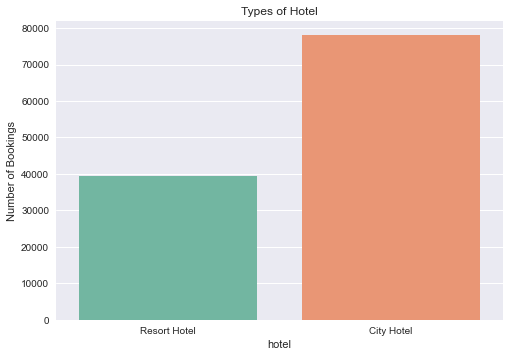

In [27]:
sns.countplot(x= 'hotel', data=df, palette='Set2')
plt.title('Types of Hotel')
plt.ylabel('Number of Bookings')

plt.show()

Hotel yang ada di dataset ini terdapat 2 jenis hotel, yaitu City hotel dan Resort hotel.

In [121]:
# membuat dataframe yang berisikan data tamu yang benar datang ke kedua jenis hotel
both = df[df['is_canceled'] == 0]

### __Guests' Country Origin__

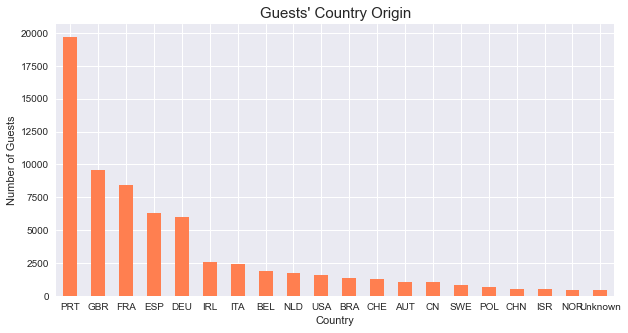

In [29]:
top_20 = both['country'].value_counts().head(20)

plt.figure(figsize=(10,5))
top_20.plot(kind='bar', color='coral')
plt.title("Guests' Country Origin", size=15)
plt.xticks(rotation=0)
plt.xlabel('Country')
plt.ylabel('Number of Guests')

plt.show()

Pada grafik di atas, data yang digunakan adalah data tamu yang jadi datang (tidak cancel). Grafik ini memuat Top 20 negara asal tamu yang menginap di hotel. Tamu tersebut sebagian besar berasal dari negara-negara Eropa, dan negara Portugal sebagai negara asal tamu terbanyak. Lokasi hotel bertempat di Portugal, jadi memang sebagian besar tamu berasal dari Portugal dan negara-negara Eropa sekitarnya. Hanya ada beberapa negara di luar Eropa yang datang ke hotel ini, seperti USA dan China.

### __Guests Arrival by Month__

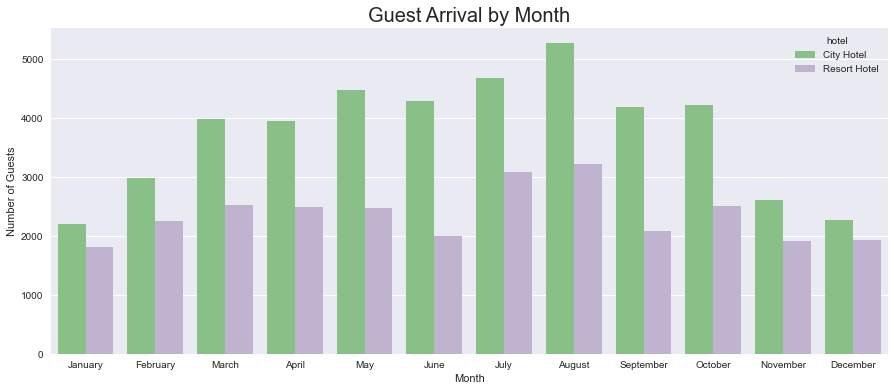

In [119]:
# membuat df yang berisi data hotel dan bulan kedatangan 
arrival_month = both[['arrival_date_month', 'hotel']].sort_values("arrival_date_month")

# membuat list bulan yang diurutkan
month_order = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

arrival_month["arrival_date_month"] = pd.Categorical(arrival_month["arrival_date_month"], categories=month_order, ordered=True)

plt.figure(figsize=(15,6))
sns.countplot(data=arrival_month, x ='arrival_date_month', hue='hotel', palette='Accent')
plt.title('Guest Arrival by Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Guests')

plt.show()

Pada grafik di atas, data yang digunakan adalah data tamu yang jadi datang (tidak cancel). Grafik ini menunjukan jumlah tamu yang data di tiap hotel per bulannya. Kedua tipe hotel memiliki grafik yang hampir sama. High season terjadi pada saat musim panas, sedangkan pada musim dingin mengalami penurunan jumlah tamu yang datang. 

**Business insight:** Manajemen hotel dapat meningkatkan promosi pada saat musim dingin untuk mendapatkan tamu yang lebih banyak. Salah satunya dengan memberikan potongan harga atau paket-paket menginap yang spesial. Hal ini perlu dipertimbangkan mengingat musim dingin yang terjadi pada akhir tahun termasuk holiday season karenan terdapat libur natal dan tahun baru. 

### __Number of Adults, Children, and Babies on Hotel__

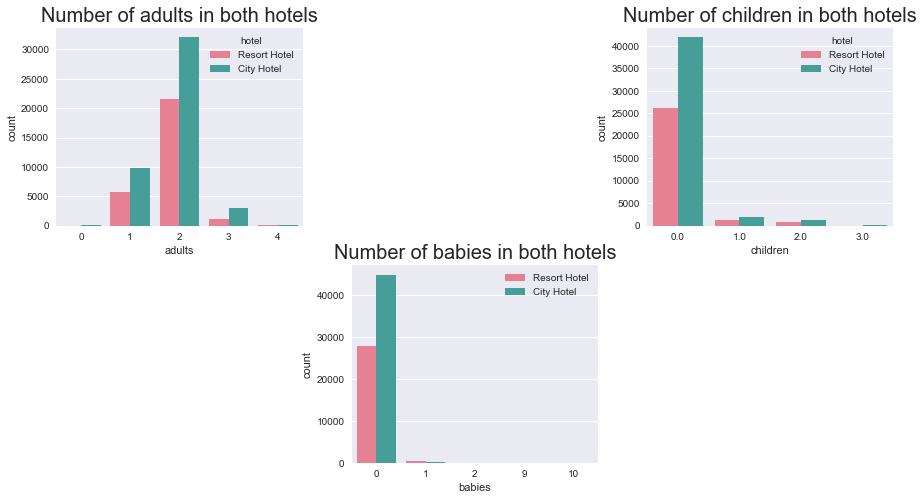

In [86]:
plt.figure(figsize=(15, 8))

plt.subplot(2,3,1)
sns.countplot(x='adults',hue='hotel', data=both, palette='husl')
plt.title("Number of adults in both hotels", size=20)

plt.subplot(2,3,3)
sns.countplot(data = both, x = 'children', hue='hotel', palette='husl')
plt.title("Number of children in both hotels", size=20)

plt.subplot(2,3,5)
sns.countplot(x='babies',hue='hotel', data=both, palette='husl')
plt.title("Number of babies in both hotels", size=20)
plt.legend(loc='upper right')

plt.show()

Pada grafik 'adults', tamu yang datang kebanyakan berjumlah 2 orang. Jika melihat grafik 'children' dan 'babies' sebagian besar tamu tidak memiliki anak dan bayi, dapat disumpulkan tamu yang adalah pasangan. City Hotel menjadi pilihan dari sebagian besar tamu tersebut. Tamu yang memiliki anak dan bayi juga lebih memilih City Hotel daripada Resort Hotel. 

**Business Insight:** Resort hotel dapat membuat promosi dengan paket harga spesial untuk keluarga agar meningkatkan jumlah tamu yang berkeluarga.

### __Hotel Preference by Costumer Type__

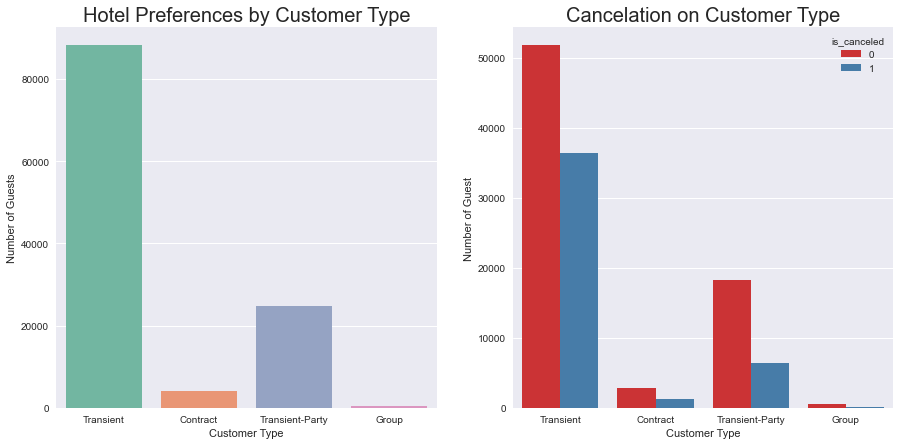

In [102]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'customer_type', palette='Set2')
plt.title('Hotel Preferences by Customer Type', size=20)
plt.xlabel('Customer Type')
plt.ylabel('Number of Guests')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'customer_type', hue='is_canceled', palette='Set1')
plt.title('Cancelation on Customer Type', size=20)
plt.xlabel('Customer Type')
plt.ylabel('Number of Guest')

plt.show()

Menurut https://www.xotels.com/en/glossary/transient/ , Tamu hotel dibagi ke dalam 2 kategori yaitu Grup dan Non grup. Di dalam kategori non group diantaranya adalah transient, yaitu tamu yang sedang berlibur atau berpergian yang mencari penginapan dengan waktu singkat ataupun dalam keadaan 'urgent'.

Untuk tipe Transient Party, berdasarkan keterangan https://www.sciencedirect.com/science/article/pii/S2352340918315191 , Transient party adalah pesanan dari tamu yang berasosiasi dengan tamu transient lainnya, contoh Keluarga yang ingin memesan beberapa kamar. 

Grafik pertama menunjukan preferensi hotel dari beberapa tipe customer. Customer yang datang ke hotel sebagian besar adalah tipe Transient. Untuk tipe Group dan Contract jumlahnya sedikit. Grafik kedua adalah pembatalan pesanan pada tiap jenis customer. Customer jenis transient paling banyak melakukan pembatan dibandingkan dengan Group dan Contract.

**Business Insight:** Manajemen hotel dapat melakukan promosi lebih pada tipe customer Group dan Contract mengingat ratio pembatalan pesanannya lebih kecil dibandingkan dengan customer Transient. Customer Group menginginkan jumlah kamar yang banyak sehingga pihak hotel dapat memberikan promo harga. Untuk customer contract, pihak hotel bisa menjalin kerjasama dengan beberapa company jika ingin melakukan acara-acara pertemuan.

### __Average Daily Rates by Month__

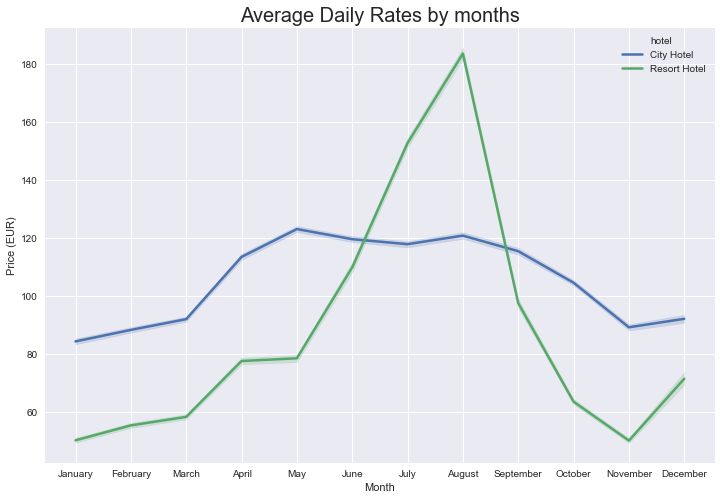

In [117]:
# membuat df yang berisi data hotel, bulan kedatangan dan ADR nya
room_prices_monthly = both[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# membuat list bulan yang diurutkan
month_order = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=month_order, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average Daily Rates by months", fontsize=20)
plt.xlabel("Month")
plt.ylabel("Price (EUR)")

plt.show()

Grafik di atas menunjukkan perubahan rata-rata harga harian per bulannya di tiap jenis hotel. Kedua hotel mengalami fluktuasi perubahan harga tiap bulannya. Harga pada kedua hotel mengalami kenaikan saat musim dingin sudah berakhir (april), lalu mengalami penurunan ketika musim panas mulai berakhir di bulan (september), dan terjadi kenaikan sedikit pada bulan Desember (holiday season). Range kenaikan harga pada City hotel tidak terlalu besar jika dibandingkan dengan Resort hotel. Range harga pada city hotel berkisar 80 - 120 Euro, sedangkan harga di Resort hotel dari sekitar 50 Euro hingga 180 Euro saat musim panas.

**Business Insight:** 

### __Types of Deposit__

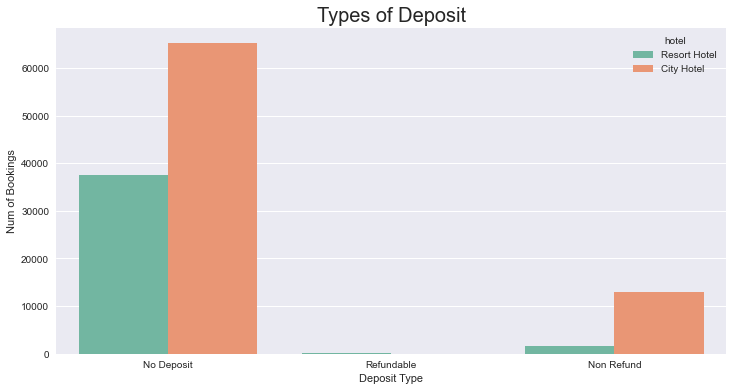

In [34]:
plt.figure(figsize=(12, 6))

sns.countplot(data = df, x = 'deposit_type',hue='hotel', palette='Set2')
plt.title('Types of Deposit', size=20)
plt.xlabel('Deposit Type')
plt.ylabel('Num of Bookings')

plt.show()

Grafik jumlah pesanan berdasarkan tipe deposit pada kedua hotel menunjukkan sebagian besar pesanan tidak memerlukan deposit. 

**Business Insight:** Pihak hotel perlu meninjau untuk melakukan kebijakan pesanan yang mewajibkan adanya deposit. Tidak adanya deposit dapat mempengaruhi pembatalan dalam pesanan kamar oleh customer.

### __Bookings by Market Segment__

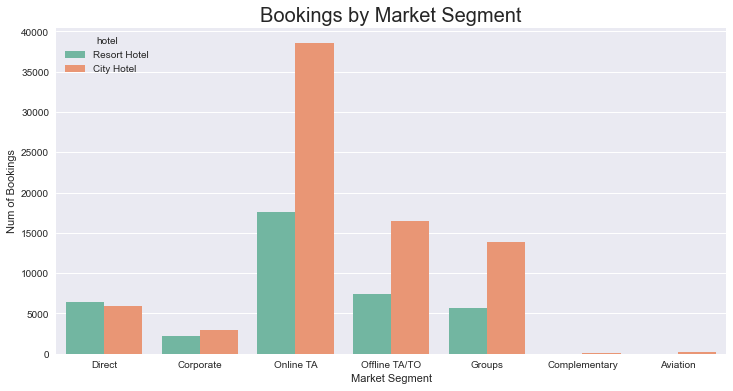

In [35]:
plt.figure(figsize=(12, 6))

sns.countplot(data = df, x = 'market_segment',hue='hotel', palette='Set2')
plt.title('Bookings by Market Segment', size=20)
plt.xlabel('Market Segment')
plt.ylabel('Num of Bookings')

plt.show()

### __Meal Types on Type Hotel__

In [123]:
# membuat 2 dataframe yang berisikan data tamu yang benar datang pada masing-masing jenis hotel

resort = df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city = df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

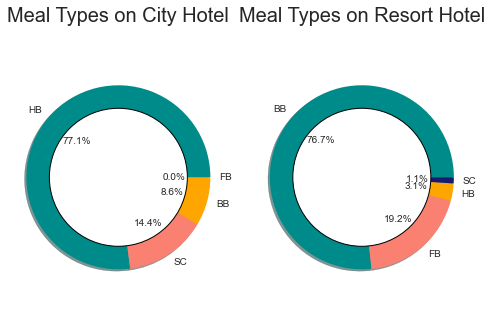

In [126]:
# Pie Chart City hotel
labels1 = city['meal'].unique()
sizes1 = city['meal'].value_counts()
colors = ['darkcyan', 'salmon', 'orange', 'midnightblue']

plt.subplot(1,2,1)
plt.pie(sizes1, labels=labels1, colors=colors,
        autopct='%1.1f%%', shadow=True)
centre_circle1 = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1)
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle1)
plt.axis('equal')
plt.title('Meal Types on City Hotel', size=20)

# Pie Chart Resort hotel
labels2 = resort['meal'].unique()
sizes2 = resort['meal'].value_counts()

plt.subplot(1,2,2)
plt.pie(sizes2, labels=labels2, colors=colors,
        autopct='%1.1f%%', shadow=True)
centre_circle2 = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1)
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle2)
plt.axis('equal')
plt.title('Meal Types on Resort Hotel', size=20)

plt.show()

Pada City hotel sebagian besar tamu memilih meal type yang Half Broad (Breakfast and one other meal--usually dinner). Sekitar 14% tamu di city hotel memilih meal type SC (no meal package), hal ini mungkin terjadi karena tamu lebih memilih makanan khas di kota tersebut mengingat lokasi hotelnya yang berada di pusat kota. Hal ini di dukung juga dengan tidak adanya tamu city hotel yang mengambil pake FB (Full Broad).

Pada resort hotel meal type BB (Bed and Breakfast) menjadi pilihan sebagian besar tamu yang datang. Berbeda dengan tamu pada city hotel, tamu resort hotel banyak memilih meal type (FB). Ini bisa terjadi karena konsep resort hotel yang biasanya berada di alam dan agak jauh dari pusat kota, sehingga tamu lebih memilih untuk menikmati fasilitas dan pemandangan yang diberikan di resort hotel, tidak selalu berpergian untuk mengelilingi kota. 

### __Number of Cancelation by Hotel__

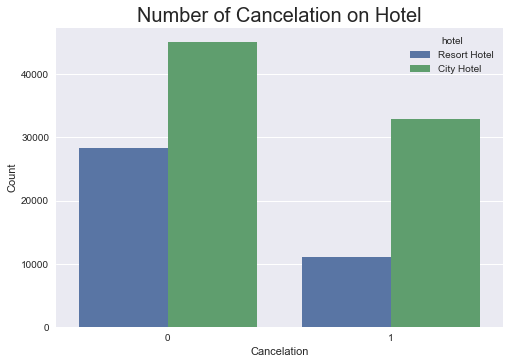

In [52]:
sns.countplot(data=df, x='is_canceled', hue='hotel')
plt.title('Number of Cancelation on Hotel', size=20)
plt.xlabel('Cancelation')
plt.ylabel('Count')

plt.show()

### __Repeated Guests vs Cancelation__

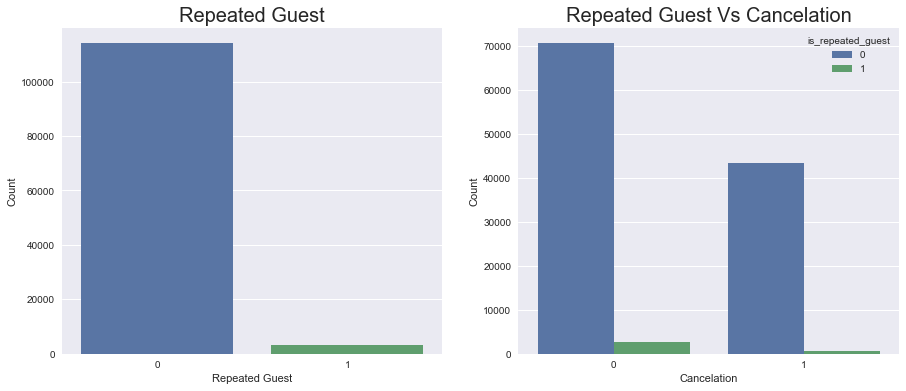

In [53]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data = df, x = 'is_repeated_guest')
plt.title('Repeated Guest', fontsize = 20)
plt.xlabel('Repeated Guest')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'is_canceled', hue = 'is_repeated_guest')
plt.title('Repeated Guest Vs Cancelation', fontsize = 20)
plt.xlabel('Cancelation')
plt.ylabel('Count')

plt.show()

Grafik Repeated Guest vs Cancelation menunjukan sebagian besar tamu bukan yang termasuk pernah menginap di hotel ini. 

**Business Insight:** Perlu adanya penetrasi marketing kepada tamu yang sudah pernah menginap apalagi kemungkinan pembatalan oleh tamu yang pernah menginap sangat kecil.

### __Arriving Year, Lead Time and Cancelation__

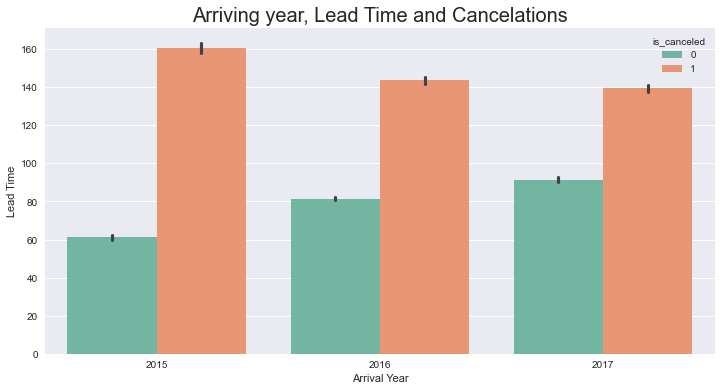

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df, palette='Set2')
plt.title('Arriving year, Lead Time and Cancelations', size=20)
plt.xlabel('Arrival Year')
plt.ylabel('Lead Time')


plt.show()

Berdasarkan grafik di atas pesanan yang lead time-nya di bawah 90 hari memiliki peluang lebih kecil untuk dibatalkan daripada pesanan yang lead time-nya di atas 90 hari.

**Business Insight:** Manajemn hotel bisa membuat kebijakan dengan melakukan kewajiban deposit untuk pesanan yang dilakukan dari jauh-jauh hari. Apabila terjadi pembatalan, deposit tersebut bisa menjadi milik hotel, sehingga hotel tidak terlalu rugi atas pembatalan pesanan tersebut.